Sales Dataset Exploration

In [1]:
import pandas as pd

# Load your dataset
sales = pd.read_csv(r"C:\Project_Guvi\Capstone5\Pizza_Sale - pizza_sales.csv")

# Display the first five rows of the dataset
print("First Five Rows:")
print(sales.head())

# Overview of the dataset
print("\nDataset Overview:")
print(sales.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(sales.describe())

# Checking for missing values in each column
print("\nMissing Values:")
print(sales.isnull().sum())

# Displaying the names of all columns in the dataset
print("\nColumn Names:")
print(sales.columns)

# Checking for duplicated rows in the dataset
print("\nDuplicated rows:")
print(sales.duplicated().sum())

# Displaying the count of unique values in each column
print("\nUnique Values:")
print(sales.nunique())


First Five Rows:
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoke

Data Cleaning-Sales Dataset

In [3]:
# Columns with missing values to fill
missing_value_columns_name = ['pizza_name_id', 'total_price', 'pizza_category', 
                               'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(sales, column_to_fill, reference_columns):
    for idx, row in sales[sales[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = sales[(sales[reference_columns] == ref_values).all(axis=1) & sales[column_to_fill].notnull()]
        if not matching_row.empty:
            sales.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in missing_value_columns_name:
    ref_columns = [col for col in missing_value_columns_name if col != column]
    fill_missing_values(sales, column, ref_columns)    

# Remove outliers function
def remove_outliers(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
     # Print rows before removing outliers
    before_rows = len(df)
    print("\nRows before removing outliers:",before_rows)
    
    for column in numerical_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Filter out outliers
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
        
    # Print rows after removing outliers
    after_rows = len(df)
    print("\nRows after removing outliers:",after_rows)
    print(f"\nRemoved {before_rows - after_rows} rows.")
    return df

# Apply remove_outliers function
sales = remove_outliers(sales)



Rows before removing outliers: 48620

Rows after removing outliers: 47665

Removed 955 rows.


In [5]:
# Function to parse dates
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')
    
# Parse order_date column
sales['order_date'] = sales['order_date'].apply(parse_dates)

# Convert to the desired format
sales['order_date'] = sales['order_date'].dt.strftime('%d-%m-%Y')

# Convert the date column to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')

In [7]:
# Extract additional features from 'order_date'
def extra_features_from_date(df):
    df['day_of_week'] = df['order_date'].dt.weekday +1 #Starts with 1 as Monday to 7 as Sunday
    df['day_of_year'] = df['order_date'].dt.dayofyear 
    df['day_of_month'] = df['order_date'].dt.day
    df['week_of_year'] = df['order_date'].dt.strftime('%W') #week starts on Monday, new year days preceeding the first monday is week 0
    df['month'] = df['order_date'].dt.month    
    return df

# Apply the function to the sales DataFrame
sales = extra_features_from_date(sales)

# Replace specific ingredient names for consistency
sales['pizza_ingredients'] = sales['pizza_ingredients'].replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

# Display the first two rows of the updated DataFrame
sales.head(2)

# Save the updated DataFrame to CSV
sales.to_csv("C:\\Project_Guvi\\Capstone5\\Updated_sales_data.csv",index = False)

Exploratory Data Analysis

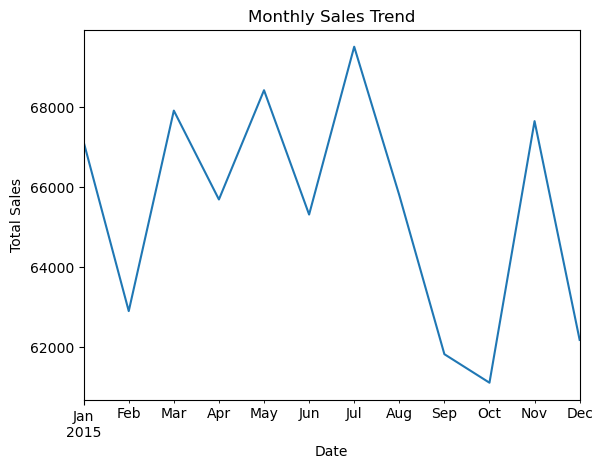

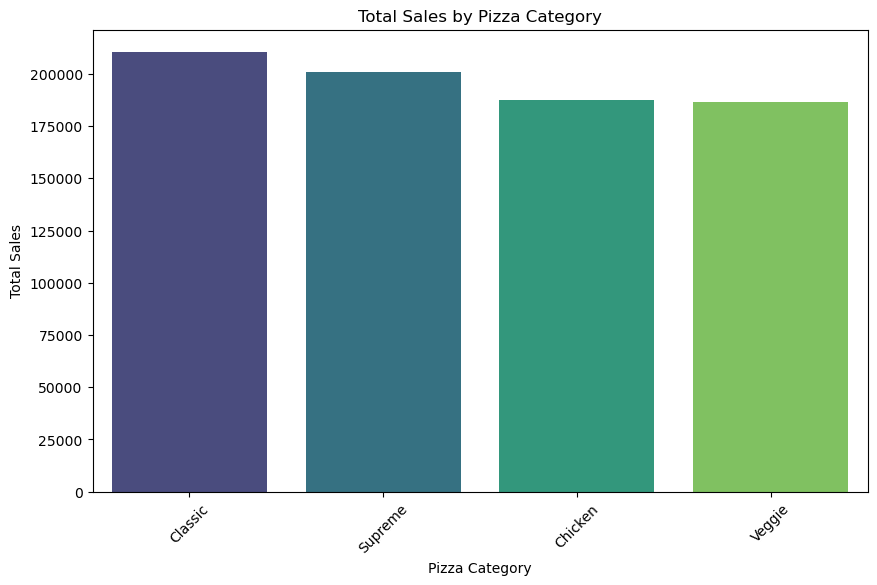

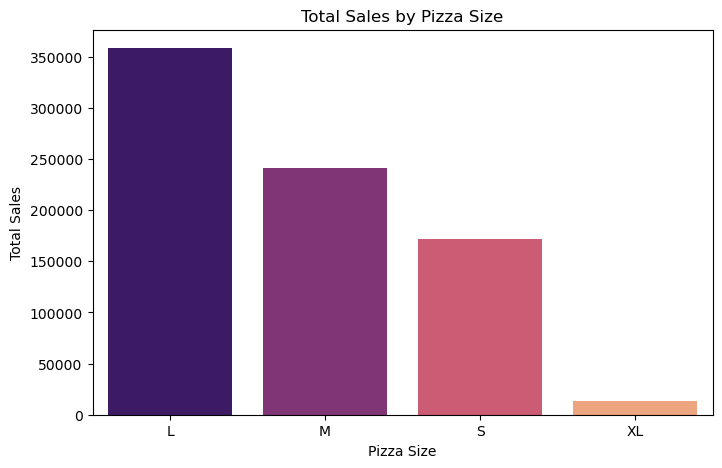

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="whitegrid")

# Total Sales by Pizza Category
category_sales = sales.groupby('pizza_category')['total_price'].sum().reset_index()
category_sales = category_sales.sort_values(by='total_price', ascending=False)

# Sales trend over time
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales.set_index('order_date', inplace=True)
sales.resample('M')['total_price'].sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Plot Total Sales by Pizza Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='pizza_category', y='total_price', palette='viridis')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#  Total Sales by Pizza Size
size_sales = sales.groupby('pizza_size')['total_price'].sum().reset_index()
size_sales = size_sales.sort_values(by='total_price', ascending=False)

# Plot Total Sales by Pizza Size
plt.figure(figsize=(8, 5))
sns.barplot(data=size_sales, x='pizza_size', y='total_price', palette='magma')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.show()



Integrdients Dataset Exploration

In [11]:
import pandas as pd

# Load your dataset
ingredients = pd.read_csv(r"C:\Project_Guvi\Capstone5\Pizza_ingredients - Pizza_ingredients.csv")

# Display the first five rows of the dataset
print("First Five Rows:")
print(ingredients.head())

# Overview of the dataset
print("\nDataset Overview:")
print(ingredients.info())

# Checking for missing values in each column
print("\nMissing Values:")
print(ingredients.isnull().sum())

# Displaying the names of all columns in the dataset
print("\nColumn Names:")
print(ingredients.columns)

# Checking for duplicated rows in the dataset
print("\nDuplicated rows:")
print(ingredients.duplicated().sum())

# Displaying the count of unique values in each column
print("\nUnique Values:")
print(ingredients.nunique())

First Five Rows:
  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), objec

In [13]:
# Identify rows with missing values in 'Items_Qty_In_Grams'
missing_rows = ingredients[ingredients['Items_Qty_In_Grams'].isnull()]
print("\nRows with Missing 'Items_Qty_In_Grams':")
missing_rows


Rows with Missing 'Items_Qty_In_Grams':


,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [15]:
# filling missing values in "Items_Qty_In_Grams" column

import pandas as pd
import numpy as np

# Step 1: Create a new 'pizza_size' column by extracting the last character from 'pizza_name_id'
ingredients['pizza_size'] = ingredients['pizza_name_id'].str[-1]

# Step 2: Map the extracted character to actual size labels
size_mapping = {'s': 'S', 'm': 'M', 'l': 'L'}
ingredients['pizza_size'] = ingredients['pizza_size'].map(size_mapping)

# Step 3: Calculate the average 'Items_Qty_In_Grams' for each 'pizza_size'
average_qty_by_size = ingredients.groupby('pizza_size')['Items_Qty_In_Grams'].mean().round()

# Step 4: Fill missing values using the average for the corresponding pizza size
def fill_missing_values(row):
    if pd.isna(row['Items_Qty_In_Grams']):
        return average_qty_by_size.get(row['pizza_size'], np.nan)
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values
ingredients['Items_Qty_In_Grams'] = ingredients.apply(fill_missing_values, axis=1)

# Drop the 'pizza_size' Column
ingredients  = ingredients .drop(['pizza_size'],axis=1)

# Replace specific ingredient names for consistency
ingredients['pizza_ingredients'] = ingredients['pizza_ingredients'].replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

# Save the updated dataset
ingredients.to_csv('C:\\Project_Guvi\\Capstone5\\Updated_ingredients_data.csv', index=False)

print("\nMissing values filled and updated dataset saved.")



Missing values filled and updated dataset saved.


Model Building

In [17]:
import pandas as pd

# Load the  datasets
sales = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_sales_data.csv')
ingredients = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_ingredients_data.csv')


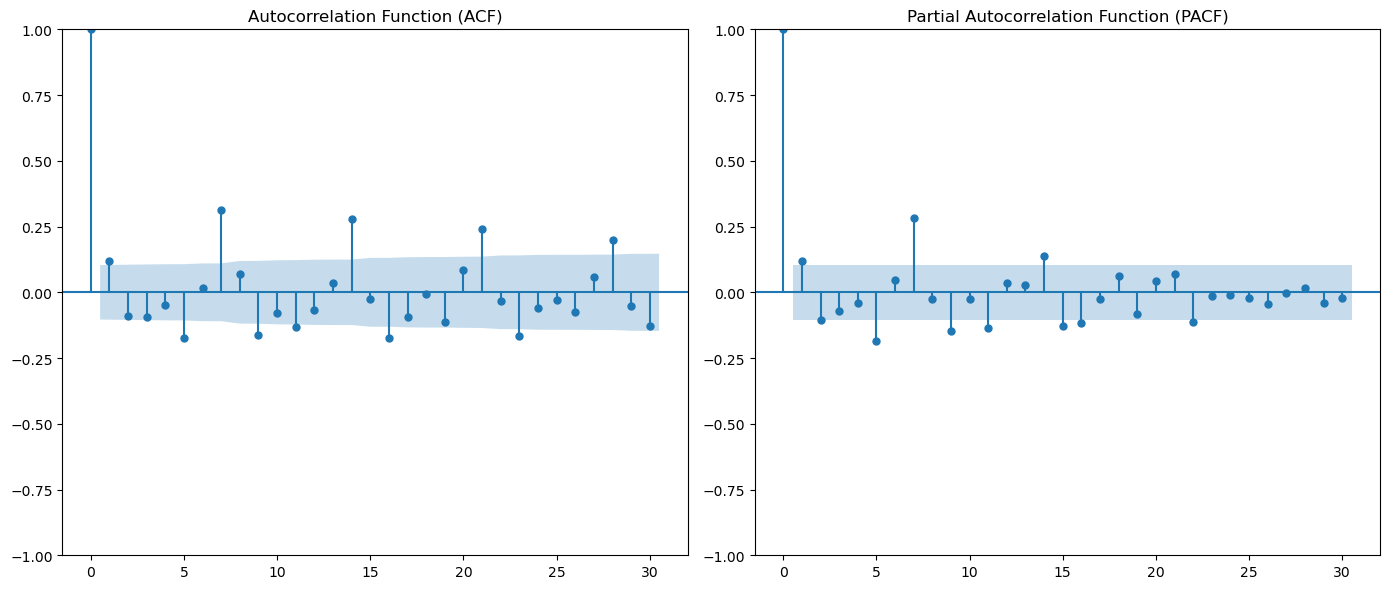

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aggregate the sales data to daily level
daily_sales = sales.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(daily_sales['quantity'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(daily_sales['quantity'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_sales['quantity']) 
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print ADF test results
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
for key, value in critical_values.items():
    print(f'Critical Value ({key}): {value}')

# Check for stationarity based on p-value
if p_value <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is non-stationary (p-value > 0.05).")


ADF Statistic: -5.134135161818009
p-value: 1.1964565212419492e-05
Critical Value (1%): -3.4496162602188187
Critical Value (5%): -2.870028369720798
Critical Value (10%): -2.5712922615505627
The time series is stationary (p-value <= 0.05).


In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Grouping the data by 'order_date' and summing 'quantity'
daily_sales = sales.groupby('order_date')['quantity'].sum().reset_index()

# Function to train ARIMA model and calculate overall MAPE
def evaluate_arima_model_overall(data, p, d, q):
    actual_values = []
    predicted_values = []
    
    # Set 'order_date' as index
    data.set_index('order_date', inplace=True)
    
    # Split the data into training and testing sets (80-20 split)
    split_point = int(len(data) * 0.8)
    train, test = data['quantity'][:split_point], data['quantity'][split_point:]
    
    # Build the ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()
    
    # Forecast for the length of the test set
    forecast = fitted_model.forecast(steps=len(test))
    
    # Collect actual and predicted values for overall MAPE calculation
    actual_values.extend(test.values)
    predicted_values.extend(forecast)
    
    # Calculate overall MAPE
    overall_mape = mean_absolute_percentage_error(actual_values, predicted_values)
    
    return overall_mape

# Evaluate the model with the chosen p, d, q values
p, d, q = 1, 0, 1
overall_mape = evaluate_arima_model_overall(daily_sales, p, d, q)

# Display the overall MAPE
print(f'Overall MAPE: {overall_mape:.2%}')


Overall MAPE: 17.07%


In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the sales data 
sales = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_sales_data.csv')

# Ensure 'order_date' is in datetime format
sales['order_date'] = pd.to_datetime(sales['order_date'])

# Group the data by 'order_date' and sum 'quantity'
daily_sales = sales.groupby('order_date')['quantity'].sum().reset_index()

# Train ARIMA model
p, d, q = 1, 0, 1  
model = ARIMA(daily_sales['quantity'], order=(p, d, q))
fitted_model = model.fit()

# Forecast for the next 7 days
forecasted_quantities = fitted_model.forecast(steps=7)

# Create a DataFrame for forecasted data
last_date = daily_sales['order_date'].max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)  
forecast_df = pd.DataFrame({
    'forecasted_date': forecast_dates,
    'forecasted_quantity': forecasted_quantities
})

# Load the ingredients data
ingredients_data = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_ingredients_data.csv')

# Set up a dictionary to hold total ingredient requirements
ingredient_totals = {}

# Calculate ingredient quantities based on each pizza's requirement
for _, row in ingredients_data.iterrows():
    pizza_name = row['pizza_name']
    ingredient_list = row['pizza_ingredients'].split(', ')  
    qty_per_pizza = row['Items_Qty_In_Grams'] / 100  # Adjust if quantity is not in grams per pizza

    # Get the forecasted quantity for this pizza type
    forecasted_quantity = forecast_df['forecasted_quantity'].sum()  

    # Estimate ingredient requirements for the forecasted quantity of this pizza type
    for ingredient in ingredient_list:
        if ingredient not in ingredient_totals:
            ingredient_totals[ingredient] = 0
        ingredient_totals[ingredient] += forecasted_quantity * qty_per_pizza

# Display ingredient requirements for the forecast period
print("Ingredient requirements for the next week:")
for ingredient, total_qty in ingredient_totals.items():
    print(f"{ingredient}: {total_qty:.2f} grams")


Ingredient requirements for the next week:
Barbecue Chicken: 843.94 grams
Red Peppers: 2813.14 grams
Green Peppers: 1547.23 grams
Tomatoes: 10971.25 grams
Red Onions: 16316.22 grams
Barbecue Sauce: 281.31 grams
Bacon: 3938.40 grams
Pepperoni: 6095.14 grams
Italian Sausage: 93.77 grams
Chorizo Sausage: 468.86 grams
Brie Carre Cheese: 281.31 grams
Prosciutto: 281.31 grams
Caramelized Onions: 150.03 grams
Pears: 93.77 grams
Thyme: 46.89 grams
Garlic: 5626.28 grams
nduja Salami: 1125.26 grams
Pancetta: 1687.89 grams
Friggitello Peppers: 281.31 grams
Chicken: 14065.71 grams
Artichokes: 2531.83 grams
Spinach: 6751.54 grams
Jalapeno Peppers: 843.94 grams
Fontina Cheese: 1125.26 grams
Gouda Cheese: 562.63 grams
Mushrooms: 7876.80 grams
Asiago Cheese: 1687.89 grams
Alfredo Sauce: 421.97 grams
Pesto Sauce: 1687.89 grams
Mozzarella Cheese: 2813.14 grams
Provolone Cheese: 281.31 grams
Smoked Gouda Cheese: 281.31 grams
Romano Cheese: 281.31 grams
Blue Cheese: 281.31 grams
Ricotta Cheese: 703.29 gra

In [27]:
# Create a DataFrame from the ingredient totals dictionary
ingredient_totals_df = pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Total_Quantity'])

# Save the DataFrame to a CSV file
ingredient_totals_df.to_csv('C:\\Project_Guvi\\Capstone5\\ingredient_requirements.csv', index=False)

print("Ingredient requirements saved to 'ingredient_requirements.csv'.")


Ingredient requirements saved to 'ingredient_requirements.csv'.


In [31]:

df = pd.read_csv('C:\\Project_Guvi\\Capstone5\\ingredient_requirements.csv')

# Display information about the DataFrame
df.info()

# Set pandas display option to show all rows in the DataFrame
pd.set_option("display.max_rows",None)

# Display the entire DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ingredient      64 non-null     object 
 1   Total_Quantity  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


,Ingredient,Total_Quantity
0,Barbecue Chicken,843.942654
1,Red Peppers,2813.142180
2,Green Peppers,1547.228199
3,Tomatoes,10971.254503
4,Red Onions,16316.224645
5,Barbecue Sauce,281.314218
6,Bacon,3938.399052
7,Pepperoni,6095.141390
8,Italian Sausage,93.771406
9,Chorizo Sausage,468.857030
